# Plotting Vector Data

This notebook demonstrates how to plot different vector data formats using `gplately`.

The following vector formats are covered:

- `CSV file`: Points representing locations with latitude and longitude
- `XY file`: Custom manually defined point data
- `Shapefile (.shp)`: Coastline polylines/polygons from static datasets
- `GPML file`: Plate tectonic features such as coastlines and topologies

Let us set up our packages:

In [14]:
import gplately
from plate_model_manager import PlateModelManager
import pygplates
import cartopy.crs as ccrs
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Setup Plate Reconstruction Model

This code initializes a plate reconstruction model using the Müller et al. (2019) plate tectonic model from GPlately's  `PlateModelManager`:

In [26]:
pm_manager = PlateModelManager()

# Load the Muller 2019 plate model 
muller2019_model = pm_manager.get_model("Muller2019", data_dir="plate-model-repo")

# This object will allow us to reconstruct the plate boundaries at different times
model = gplately.PlateReconstruction(
    muller2019_model.get_rotation_model(),
    muller2019_model.get_topologies(),
    muller2019_model.get_static_polygons()
)

# Coastlines, Continental polygons (for the landmasses), and COBs (Continental-Ocean Boundaries)
coastlines = muller2019_model.get_layer('Coastlines')
continents = muller2019_model.get_layer('ContinentalPolygons')
COBs = muller2019_model.get_layer('COBs')

# PlotTopologies object handles the plotting of the plate boundaries and features
gplot = gplately.PlotTopologies(model, coastlines=coastlines, continents=continents, COBs=COBs)

time_ma = 100  # Ma (Million years ago)


## Format 1: Plotting Points from CSV

In this method, we will learn how to plot points from a CSV file. In this example, we import data from the [PBDB]("https://paleobiodb.org/classic/displayDownloadGenerator") using the data url straight into `pandas`. Alternatively, we can download the csv file from their website and import that. The data is of the distribution of Jurassic Foraminifera (a type of microscopic organism) over time.

We're using the `Cartopy` library to plot geological features (like continents, ridges, and subduction zones). We also use GPlates to plot coastlines and other geological data at 100 Ma and place points representing the locations of Foraminifera on the map.

> `NOTE:` When importing CSV files, it is generally easier if the first row contains column names, as this helps with automatically identifying the data fields. However, if the CSV file doesn't include headers or includes extra metadata, libraries like Pandas allow you to skip these header rows when importing the data.


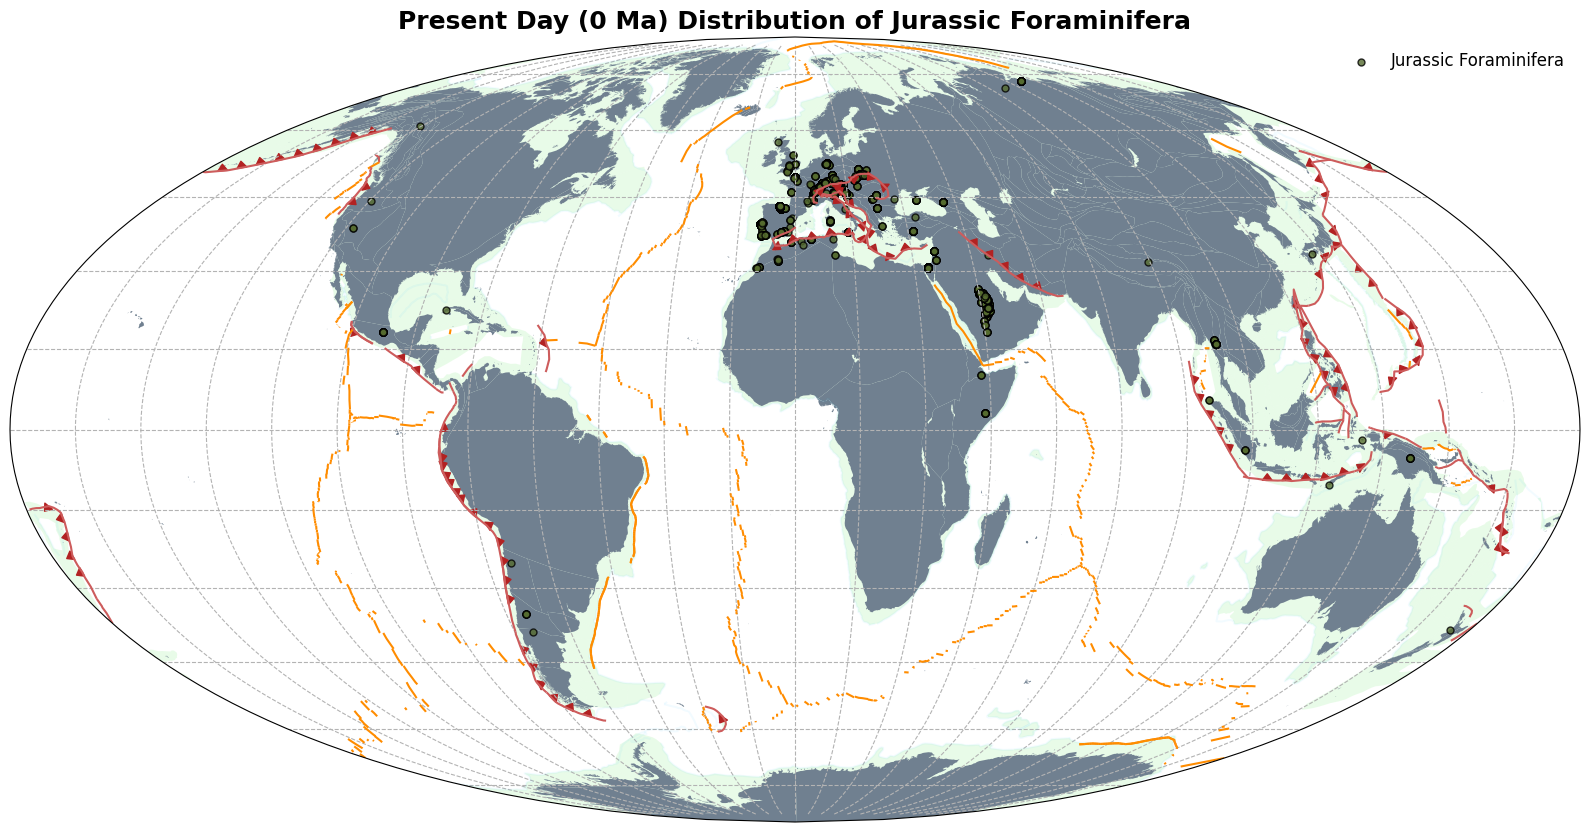

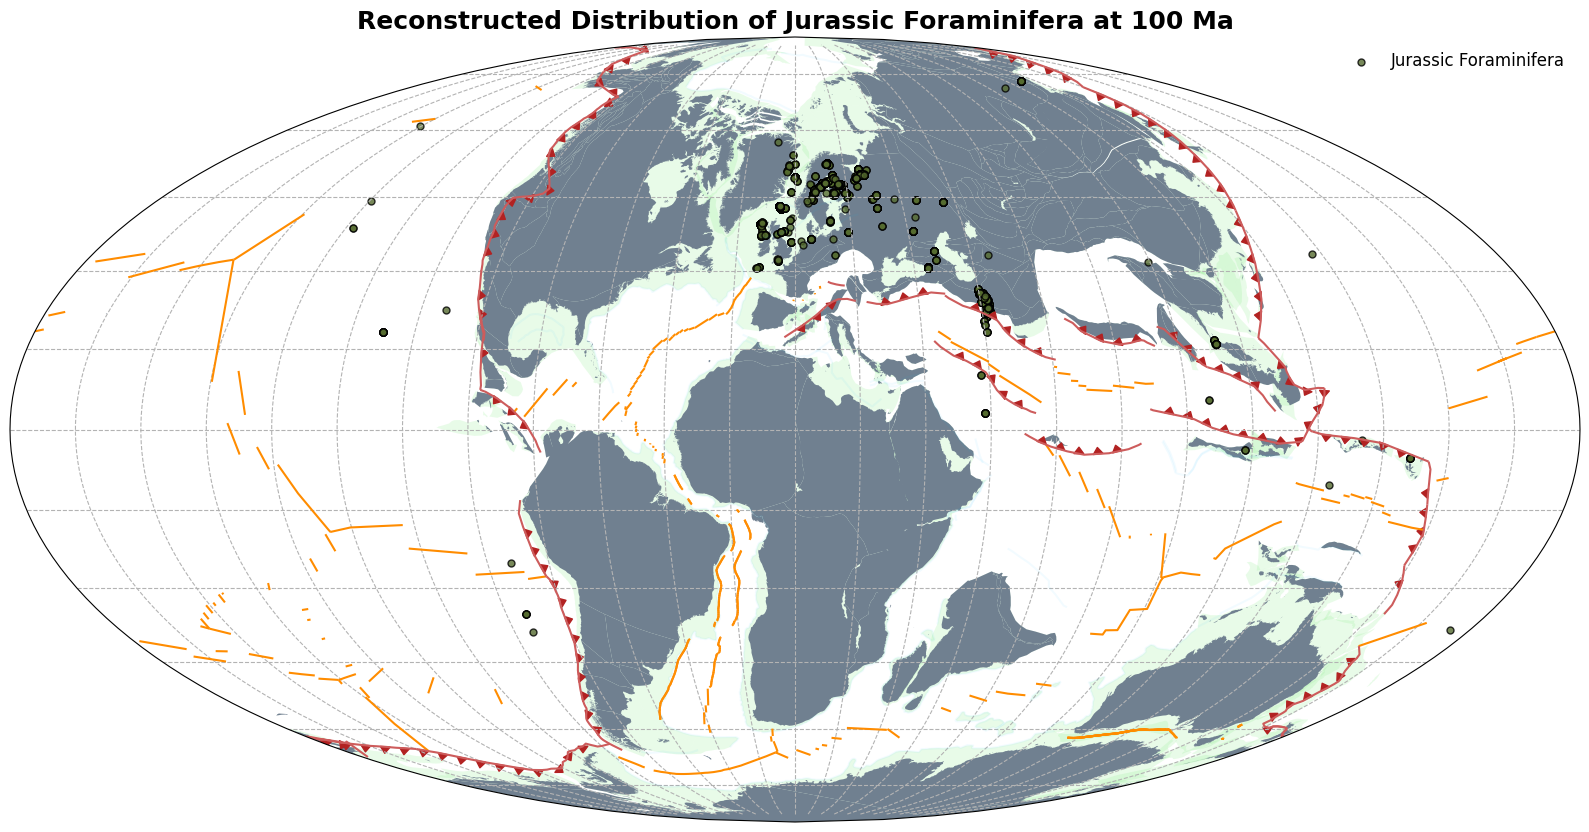

In [27]:
# ---- Load the CSV point data ----
# Replace this URL with the actual URL of your CSV file
pbdb_data_url = 'https://paleobiodb.org/data1.2/occs/list.csv?datainfo&rowcount&base_name=Foraminifera&interval=Jurassic&show=coords,env'
points = pd.read_csv(pbdb_data_url, sep=',', skiprows=18)

# The CSV contains columns for latitude and longitude
longitudes = points['lng']
latitudes = points['lat']


# ---- Present Day Example ----
# Plot for Present day (0 Ma)
plt.figure(figsize=(16, 12), dpi=100)
ax = plt.subplot(111, projection=ccrs.Mollweide(central_longitude=0))
ax.set_global()
ax.gridlines(color='0.7', linestyle='--', xlocs=np.arange(-180, 180, 15), ylocs=np.arange(-90, 90, 15))
ax.set_title("Present Day (0 Ma) Distribution of Jurassic Foraminifera", fontsize=18, fontweight='bold')

# Plot shapefile features
gplot.time = 0  # Set time to present day
gplot.plot_continent_ocean_boundaries(ax, color='deepskyblue', alpha=0.05)
gplot.plot_continents(ax, facecolor='lightgreen', alpha=0.2)
gplot.plot_coastlines(ax, color='slategray')
gplot.plot_ridges(ax, color='darkorange')
gplot.plot_trenches(ax, color='indianred')
gplot.plot_subduction_teeth(ax, color='firebrick')

# Scatter plot of the points
ax.scatter(longitudes, latitudes, color='#556B2F', transform=ccrs.PlateCarree(), label='Jurassic Foraminifera', s=25, edgecolor='black', alpha=0.8)
ax.legend(frameon=False, loc='upper right', fontsize=12)
plt.tight_layout()

# Show present day plot
plt.show()


# ---- Past (100 Ma ago) Example ----
plt.figure(figsize=(16, 12), dpi=100)
ax = plt.subplot(111, projection=ccrs.Mollweide(central_longitude=0))
ax.set_global()
ax.gridlines(color='0.7', linestyle='--', xlocs=np.arange(-180, 180, 15), ylocs=np.arange(-90, 90, 15))
ax.set_title("Reconstructed Distribution of Jurassic Foraminifera at 100 Ma", fontsize=18, fontweight='bold')

# Plot shapefile features
gplot.time = time_ma  # Set time to 100 Ma (from setup above)
gplot.plot_continent_ocean_boundaries(ax, color='deepskyblue', alpha=0.05)
gplot.plot_continents(ax, facecolor='lightgreen', alpha=0.2)
gplot.plot_coastlines(ax, color='slategray')
gplot.plot_ridges(ax, color='darkorange')
gplot.plot_trenches(ax, color='indianred')
gplot.plot_subduction_teeth(ax, color='firebrick')

# Scatter plot of the points for 100 Ma (reconstructed positions)
ax.scatter(longitudes, latitudes, color='#556B2F', transform=ccrs.PlateCarree(), label='Jurassic Foraminifera', s=25, edgecolor='black', alpha=0.8)
ax.legend(frameon=False, loc='upper right', fontsize=12)
plt.tight_layout()

# Show reconstructed plot for 100 Ma
plt.show()


## Format 2: Plotting Points from XY Data 

In [ ]:
# TBD: Add present day example & past (reconstructed) example
# Can't find example of how to do this in gplately :/

## Format 3: Plotting from a Shapefile (.shp)

<Figure size 1000x700 with 0 Axes>

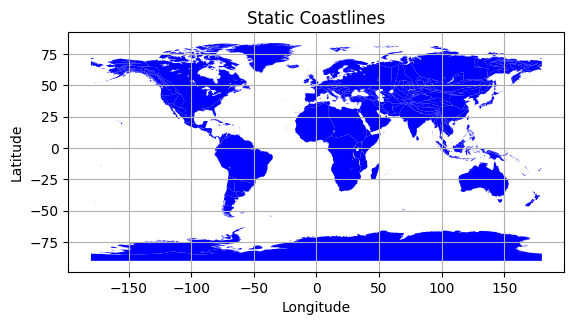

In [40]:
# TBD: Add present day example (verify whether this is right!!) & past (reconstructed) example
# TBD: Include polylines/polygons
# Can't find example of how to do this in gplately :/

# ---- Load the .shp file ----
# Update with your shapefile path
shapefile_path = "../../data/Muller_etal_2019_PlateMotionModel_v2.0_Tectonics/StaticGeometries/Coastlines/Global_coastlines_2019_v1_low_res.shp"
coastline_data = gpd.read_file(shapefile_path)

# ---- Present Day Example ----
# Plot the coastline data
plt.figure(figsize=(10, 7))
coastline_data.plot(color='blue')

# Set labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Static Coastlines')

# Show plot
plt.grid(True)
plt.show()

# ---- Past (100 Ma ago) Example ----


## Format 4: Plotting from a GPML file

In [38]:
# TBD: Add present day example & past (reconstructed) example
# TBD: Include polylines/polygons
# Can't find example of how to do this in gplately :/